# IBM Spectrum Conductor L3 training

* Change Log
051120 : dvs changed port 8080 8443


# <i>Creating a modern data platform for managing Apache Spark and Anaconda</i>
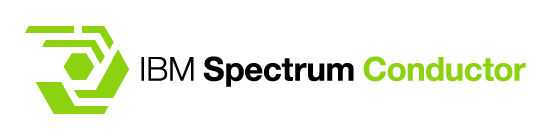
***Acknowledgements***
* Eric Fiala – Solution Architect
* Kelvin Lui - Senior Technical Product Manager - Watson Machine Learning Accelerator
* Steve Roberts – Global Offering Lead, IBM Spectrum Conductor
* Gábor Samu - Skills Leader, IBM Spectrum Computing

## Reviewing how to use a Jupyter Notebook

Jupyter Notebooks execute JSON formatted files to create, view, edit and manipulated within a web browser. A notebook is typically made up of cells which can be markup (text) or code (typically python). Code cells represent executeable elements.

While this lab does not execute any python code, it does provide a platform for a web-based view for a lab rather than a printed document. Additionally, if you are interested and have time, examples of executing Spectrum Conductor commands via the Command Line Interface (CLI) are available in the <b>Learning Basic Spectrum Conductor Commands</b> section.

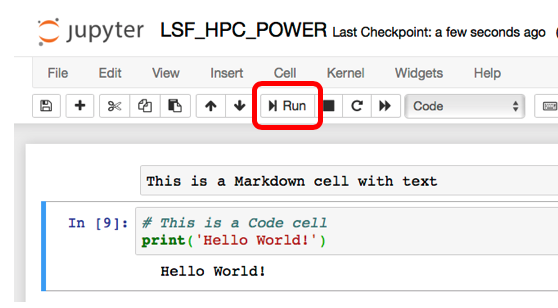

Above is a screen shot of the elements of a cell and the control buttons. The blue bar on the left indicates the active cell. There are VCR-like buttons for Run, Stop and Forward. We are most interested in the <b>Run</b> button:

This button executes the active cell and is used to progressively navigate through the notebook.

Let's execute a Code cell - select the cell below and hit the Run button:

In [ ]:
# This is a Code cell
print('Hello World!')

## Section 0 - Introduction to IBM Spectrum Conductor

IBM Spectrum Conductor is an enterprise-class, multi-tenant platform for deploying and managing modern analytics frameworks including Apache Spark, Anaconda, Jupyter and other analytic frameworks & related daemons on a common shared cluster of resources. It provides the ability to support multiple concurrent and different versions of these applications while dynamically allocating and sharing resources between tenants and applications. Spectrum Conductor provides field proven enterprise security while enabling performance at scale and maximizes resource usage and sharing to consolidate resource silos that would otherwise be tied to separate application environments.

Spectrum Conductor provides a number of benefits to organizations persuing a data analytics modernization strategy including:

* Eliminate silos with a multi-tenant, integrated application and data platform
* Simplify administration by deploying single-pane managementand monitoring across a scale-out, distributed infrastructure
* Improve data availability with global, shared access to ensure data is available exactly when needed
* Obtain faster business insights from data while reducing both capital and operational expenses
* Future-proof the data center with multidimensional scaling—including independent scaling of compute and storage infrastructure
* Reduce storage costs and improve performance with auto-mated multitier, hybrid cloud storage including flash, disk and archive

**Additional Resources**

* Spectrum Conductor Sales Kit: https://ibm.seismic.com/Link/Content/DCeoYU2GcguU2hyfjGYWD0FQ
* Documentation: [Spectrum Conductor @ IBM Knowledge Center](https://www.ibm.com/support/knowledgecenter/SSZU2E_2.4.0/getting_started/overview.html)

## Section 1 - Overview of Integrtated Portal

Spectrum Conductor features a web-based, fully integrated portal for job management, reporting and monitoring.  From the interface, users can submit and manage jobs, and administrators can control access to Spectrum Conductor through roles-based access control (RBAC) as well as defining consumers and resource plans. 

### 1.1 Logging into Spectrum Conductor

1.	Open a web browser and enter or paste this URL: http://<font color='red'>**IP_address**</font>:8443
2.	You should see the login display in Figure 1.
3.	Login with your assigned user ID and password. You should then see the display in Figure 2.

\*As provided by the course instructor

 Figure 1. Spectrum Conductor login screen

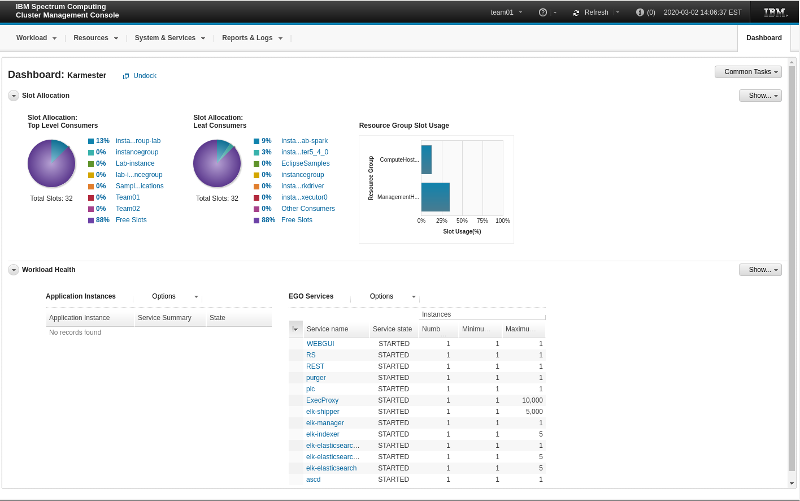 Figure 2. Spectrum Conductor dashboard view

## Section 2 - Lab Overview

IBM Spectrum Conductor enables organizations to deploy multiple versions of Apache Spark and Anaconda/Python on a shared infrastructure. This lab will focus on deploying both Apache Spark, and Anaconda/Python, Jupyter notebooks and running some example programs through these frameworks, all under the orchestration of Spectrum Conductor. As part of this, you will cover: 

* Introduction to resource management in Spectrum Conductor - consumers, resource plans
* Create unique Apache Spark instance group
* Run example SparkPi example code
* Create unique Jupyter notebook instance
* Run sample code in Jupyter notebook
* Run SnapML code in Jupyter notebook

## Section 3 - Resource management overview

Spectrum Conductor provides advanced resource management capabilities providing the solid foundation for multiple applications and multiple tenants to operate on a shared infrastructure, while managing computing resources for all workload. 

Here we discuss some key concepts which are important for the understanding of resource sharing in Spectrum Conductor.  *Resources groups* are logical groups of hosts for organizing a pool of resources. *Resource groups* can contain servers based on both IBM Power and x86 processors, thereby providing a heterogeneous resource pool. 

There are three different categories of *Resource groups* in Spectrum Conductor:

* Management hosts: resources for running management services,  without running the actual workload
* Compute hosts: resources for running distributed workload on CPU
* GPU hosts: resources for running distributed workload on GPU

A *Consumer* in Spectrum Conductor provides a way to have resources available to different tenants. Each *consumer* can be associated with 1 or more resource groups. The cluster administrator can define a *resource plan* for each group and configure for each consumer how much of the resources can be used, shared and borrowed. *Resource plans* can also be configured according to times of day. 

Next, we'll navigate through the Spectrum Conductor web interface to view the resource management capabilities.  

1. Navigate to **Resources ** > **Resource Planning (slot)** > **Resource Groups**.  Here we find the list of *Resource Groups* that are configured.  From here the cluster administrator can create, modify and delete resource groups. 




2. From the **Resource Groups** page it's possible to drill down into one of the configured *resource groups*. Here, we drill down into the ***ComputeHosts*** **Resource Group**. 



3. Navigate to **Resources ** > **Resource Planning (slot)** > **Resource Plans**.  Here we find the list of *Resource Plans* that are configured.  From here the cluster administrator can create, modify and delete resource plans. 



## Section 4 - Managing Apache Spark Instance Groups

Here, we will create our own unique Apache Spark Instance Group in IBM Spectrum Conductor. An Apache Spark instance group is an installation of Apache Spark that can be scaled to run multiple masters, and can have a history server, shuffle service and notebooks configured. Each Apache Spark instance group in Spectrum Conductor contains services that are associated with a top-level consumer (resources). Users can view details for respective user groups including applications and services. 

### 4.1 Creating the Instance Group

In the Spectrum Conductor web interface, navigate to ***Workload*** -> ***Instance Groups***. This will display all instance groups currently defined.  You will find an Instance Group already exists called ***instancegroup-lab***, which was created to serve the Jupyter notebook for the lab.  Associated with each instance group in Spectrum Conductor, the user can specify a specific version of Apache Spark which is to be deployed.  The Apache Spark instances differ from open source vanilla Apache Spark in that they use Spectrum Conductor scheduler and authentication. 

1. Now, we will create our own Instance Group for our exclusive use for the lab session. In the Instance Group window listing, click ***New***.  

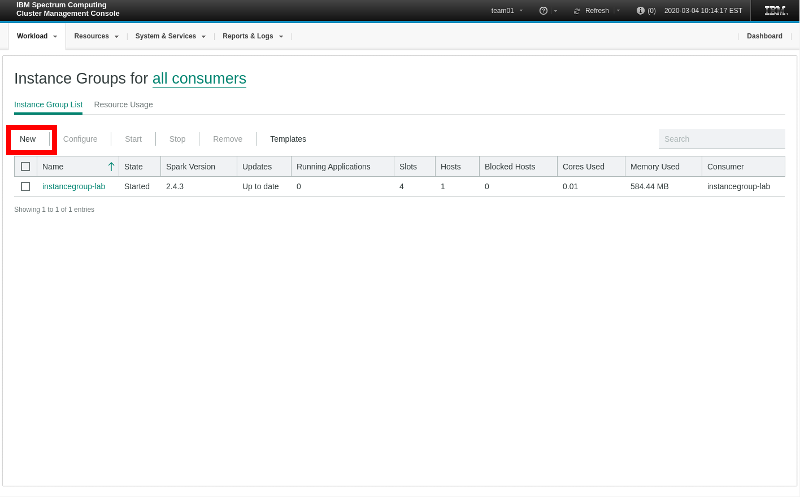

2. On the New Instance Group form, fill in the following details under ***Required Fields***:


* Instance group name: ***instancegroup-***<font color='red'>***login***</font>
* Deployment directory: ***/opt/conductor/***<font color='red'>***login***</font>
* Execution user: <font color='red'>***login***</font>
* Spark version: ***Spark 2.4.3***

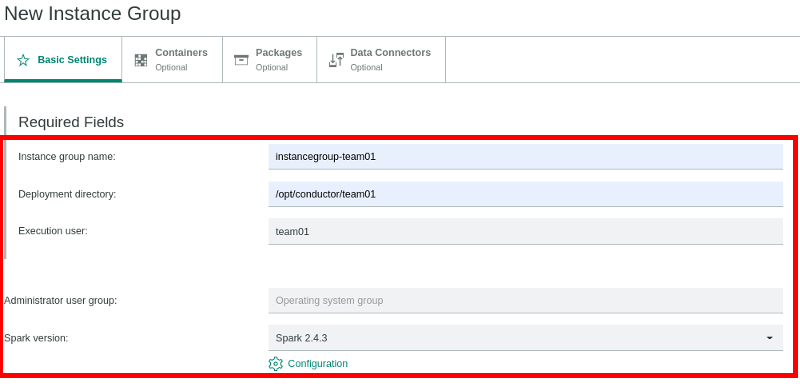 Required Fields for New Instance Group

3. Click the ***Configuration*** button under the Apache Spark version enables administrators with fine grained control of the Apache Spark on a per instance group basis, as well as advanced scheduling capabilities (provided by Spectrum Conductor).  Take the time to explore variables and settings in the ***Configure Spark 2.4.3*** popup.  

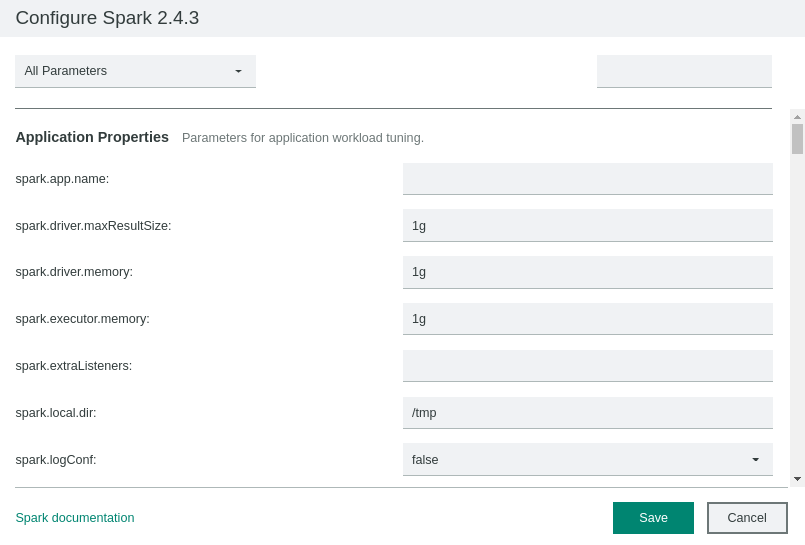

4. In the same window, scroll down to the ***Consumers*** section. Verify that the ***Instance Group*** setting is set to the consumer ***/instancegroup-***<font color='red'>***login***</font>. This should be the default value when the Instance Group is created.  

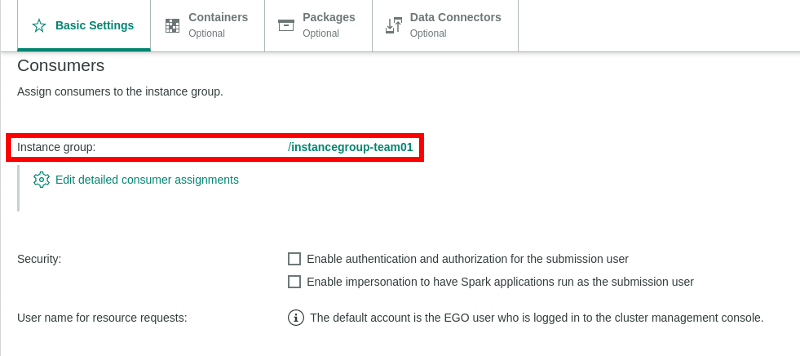 Verify settings of consumer

5. After completing all of the fields as described above, click the ***Create and Deploy Instance Group*** button. This will begin the process to create and deploy the instance group. A ***Creating Instance Group*** window will show the progress of the creation. From here, click ***Continue to Instance Group*** to finalize the operation. 

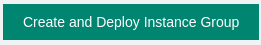


6. After a while the instance group that we have created will show status ***Ready***. We are now ready to start the instance group by clicking the ***Start*** button.  

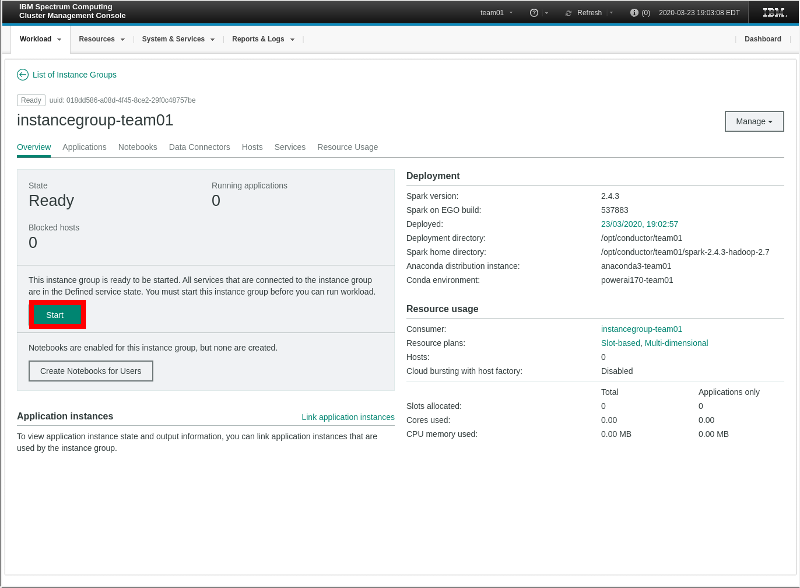 Instance group in ***Ready*** status

7. The instance group will go to status ***Started***. We are now ready to submit workload to the Apache Spark instance. 

 Instance group in ***Started*** status

At the end of these steps, we each user will have their own unique Apache Spark instance group under the control of Spectrum Conductor, ready to accept workload.  

### 4.2 Running an example program

With the instance group created and started, we are now ready to run our first application on Apache Spark. IBM Spectrum Conductor includes the example SparkPi application which we will now run under the newly created instance group. 

1. We begin by navigating in the Spectrum Conductor interface to ***Workload*** -> ***Instance Groups***. This view will show all of the instance groups defined in the system, which you login has permission to use. Here we should see ***instancegroup-lab*** and the newly created ***instancegroup-***<font color='red'>***login***</font>.<br>

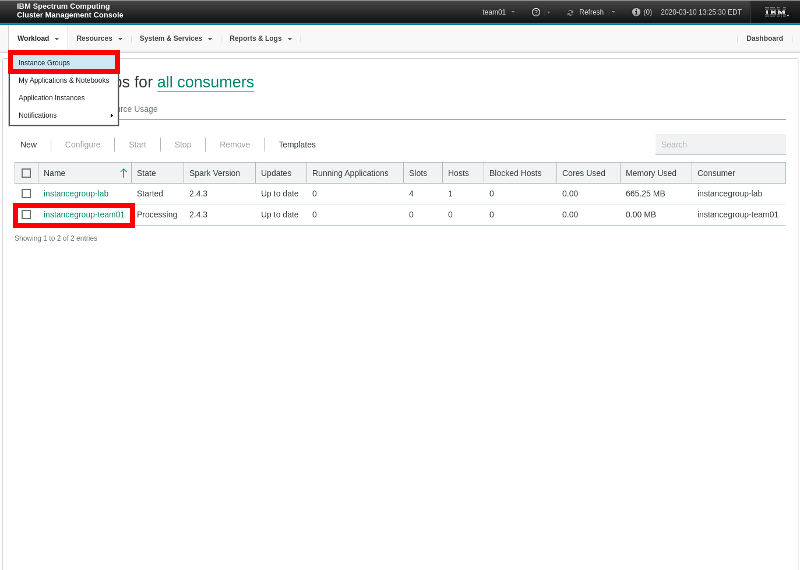 Listing of Instance Groups

2. Next, click on the hyperlink to the instance group created in section 4.1.  


3. This will bring us to the detailed view of the instance group: ***instancegroup-***<font color='red'>***login***</font>. Here, click the ***Submit Application*** button to display the ***Run Spark Application*** window.  



4. In the ***Run Spark Application*** window click on ***Load sample command***. This will automatically fill in the **SparkPi** example program details. Before clicking on ***Submit***, verify that the specified instance group is correct (i.e. ***instancegroup-***<font color='red'>***login***</font>). Click ***Submit*** to submit the **SparkPi*** job for execution to the Spectrum Conductor grid.    



5. The ***SparkPi*** job will enter run state once resources are available in the Spectrum Conductor cluster. Refresh the view in the instance group window, ***Applications*** tab to check on the status of the job. Click on the job Name and ID hyperlink to view details about the job.   

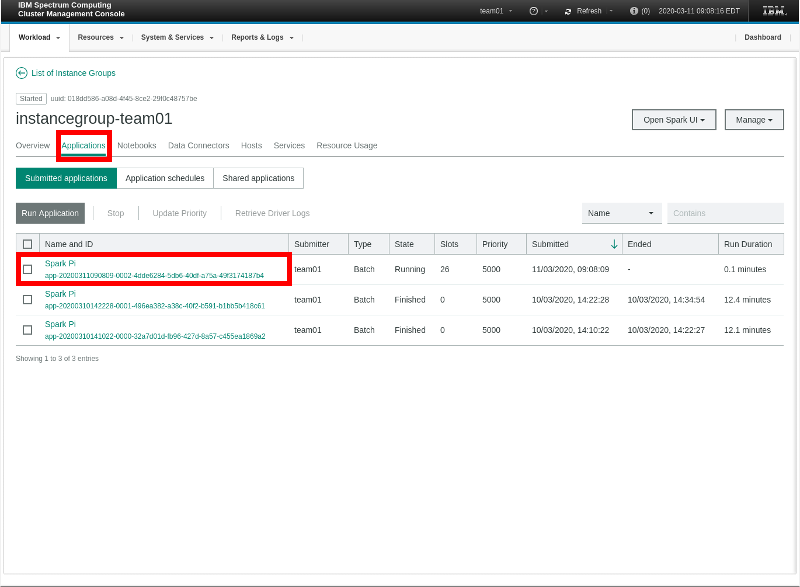

6. The job detail screen allows the user to drill down for details on the running job. There are multiple tabs which can be selected to display metrics including Performance, and Resource Usage among other details. Take the time to browse through the various tabs to view the job details. 



7. Submit a second **SparkPi*** job instance.  Browse to ***Workload*** -> ***Instance Groups*** -> ***instancegroup-***<font color='red'>***login***</font> -> ***Applications*** and click on ***Run application***. Here we see a second instance of ***SparkPi*** has been submitted and is running alongside the ***SparkPi*** instance submitted previously. You'll notice here that the two jobs are sharing the total available job slots. Furthermore, in the upper right there is a dropdown menu to open the Spark UI.  



8. Click on the ***Open Spark UI*** drop down and select the available ***Batch master***. This will open a new browser tab for the Apache Spark interface. The Apache Spark interface tab includes additional details about the workload that is running under the Apache Spark instance belonging to the instance group that was created. 



9. Finally, browse to ***instancegroup-***<font color='red'>***login***</font> and select the tab ***Resource Usage***. This will display the resource usage (# slots) of the two ***SparkPi*** jobs that were submitted above. 



### 4.3 Adding a Conda environment to an Instance Group

So far, we have created an instance group, and run some sample workloads through the instance group. Here we will modify the instance group and configure an Anaconda instance with a Jupyter Notebook. 

1. We begin by browsing to ***Resources*** -> ***Frameworks*** -> ***Anaconda Management*** in the Spectrum Conductor interface. Next, select the suitable Anaconda distribution for your architecture, and click on ***Deploy***. Here, we select ***Anaconda2019-03-Python3-Linux-ppc64le***. This will display the ***Deploy Anaconda Distribution*** window. 



2. Specify the following parameters in the ***Deploy Anaconda Distribtion*** window:


* Instance name: ***anaconda3-***<font color='red'>***login***</font>
* Deployment directory: ***/opt/conductor/***<font color='red'>***login***</font>***/anaconda3***
* Consumer: ***/instancegroup-***<font color='red'>***login***</font>
* Execution user: <font color='red'>***login***</font>

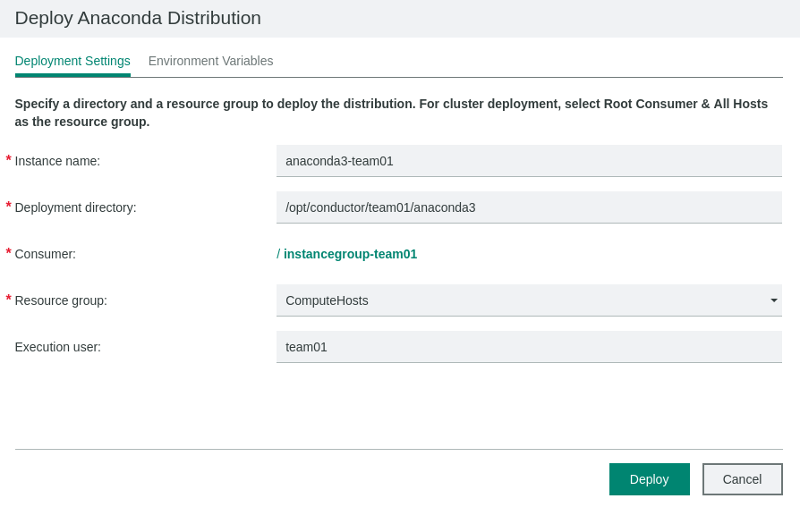

3.  Next, click on the ***Environment Variables*** tab in the ***Deploy Anaconda Distribution*** window and set the following variables: 


* Variable Name: ***PATH***, Value: ***\$PATH:/usr/bin***
* Variable Name: ***IBM_POWERAI_LICENSE_ACCEPT***, Value: ***yes***
* Variable Name: ***HOME***, Value: ***/home/***<font color='red'>***login***</font>

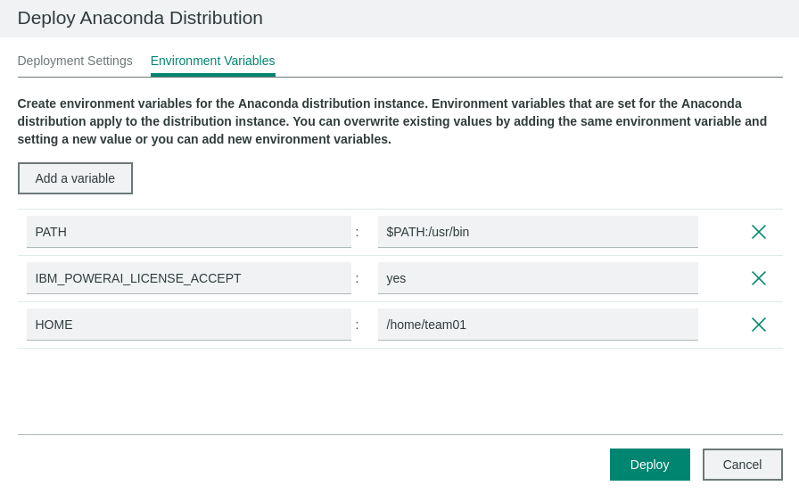

Click on ***Deploy*** and continue in the process to create the Anaconda distribution




4. In preparation for the next step, create the following .yaml file on the desktop to define an IBM Watson Machine Learning Community Edition Conda channel. In the .yaml file you'll need to change the name field to the value ***powerai170-***<font color='red'>***login***</font>. This will effectively make available in Spectrum Conductor, Watson Machine Learning Community Edition Jupyter notebooks. 

> ***name: powerai170***-<font color='red'>***login***</font> <br>
> channels: <br>
>  \- https://public.dhe.ibm.com/ibmdl/export/pub/software/server/ibm-ai/conda/ ##base powerai channel <br>
>  \- defaults <br>
> dependencies: <br>
>  \- python=3.6 <br>
>  \- powerai=1.7.0 <br>
>  \- conda <br>
>  \- jupyter <br>
>  \- jupyterlab <br>
>  \- pynacl <br>
>  \- bcrypt <br>
>  \- tornado=5.1.1 <br>
>  \- openssl <br>
>  \- pycrypto <br>
>  \- pyspark <br>
>  \- snapml-spark <br>



5. After deploying the Anaconda instance, click ***Continue to Anaconda Distribution Instance*** button. Here we will specify the desired Conda environment which will be installed. Under ***Conda environments*** click ***Add***. This will display the ***Add Conda Environment*** popup. Here check ***Create environment from a yaml file***. Select the file created in step 3 and click ***Add***. Note that it will take a bit of time to add the new Conda environment as it downloads packages from the Watson Machine Learning Community Edition repository.  

Click on ***Add*** to begin the process to add the Anaconda instance.  

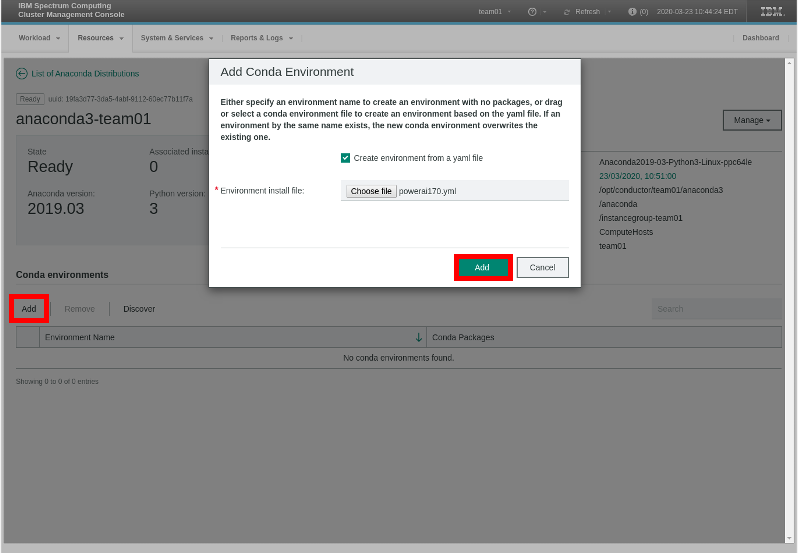

Finally, the Conda environment has been installed.

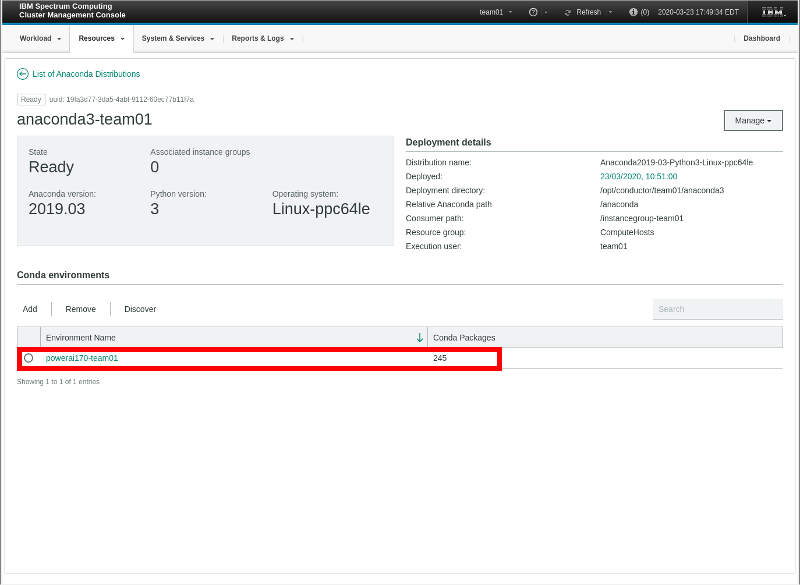
  
6. Once the Conda environment setup has completed, we must enable this newly created Conda environment for our unique instance group. Navigate to ***Workload*** -> ***Instance Groups***, and click on ***instancegroup-***<font color='red'>***login***</font>. We must first stop the instance group before any changes to the configuration can be made. From the ***Manage*** dropdown click on ***Stop***. 



Click on the ***Stop*** button to confirm the operation. 

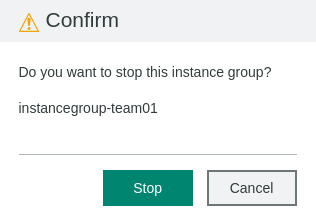

Note that when stopped, the instance group will to go status ***Ready***. 

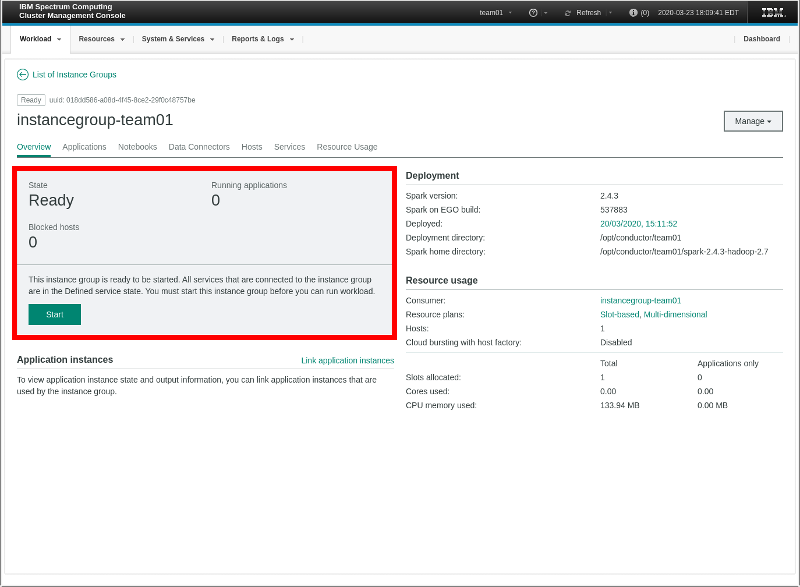

7. With the instance group stopped (status ***Ready***), we can now configure it to use the newly created conda environment. From the ***Manage*** pulldown select ***Configure***.  

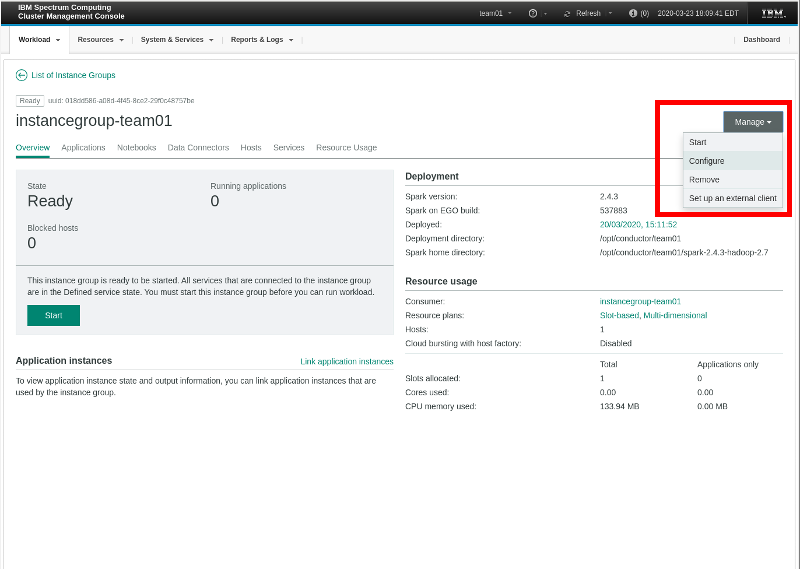

8. On the instance group configuration screen, click on ***Modify Conda Environment***.  This will display the ***Modify Anaconda*** window where we specify the following options and click ***Save***.  


* Anaconda distribution: ***Anaconda2019-03-Python3-Linux-ppc64le***
* Anaconda distribution instance: ***anaconda3-***<font color='red'>***login***</font>
* Conda environment: ***powerai170-***<font color='red'>***login***</font>



9. Next, we configure the Jupyter notebooks for the instance group. For ***Enable notebooks*** check ***Jupyter 5.4.0*** and specify the following options: 


* Anaconda distribution instance: ***anaconda3-***<font color='red'>***login***</font>
* Conda environment: ***powerai170-***<font color='red'>***login***</font>

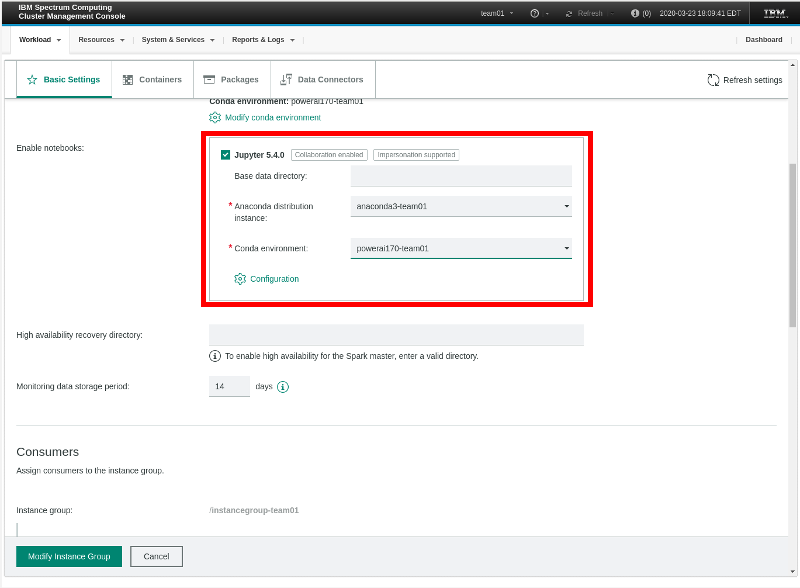

10. Update the Spark configuration of the instance group to enable SnapML. Note that this is required in order for the subsequent SnapML examples to function. Click on the ***Configuration*** link for ***Spark Configuration***. This will display the ***Configure Spark*** popup window. Scroll down to ***Additional Parameters*** and add the following parameter and click ***Save***.


* Parameter name: ***spark.jars*** 
* Parameter value: ***/opt/conductor/***<font color='red'>***login***</font>***/anaconda3/anaconda/envs/powerai170-***<font color='red'>***login***</font>***/snap-ml-spark/lib/snap-ml-spark_23-v1.6.0.jar***



11. Finally, click ***Modify Instance Group*** at the bottom of the instance group configuration page. This will make the changes take effect. Note that it will take a few moments for this operation to complete.  

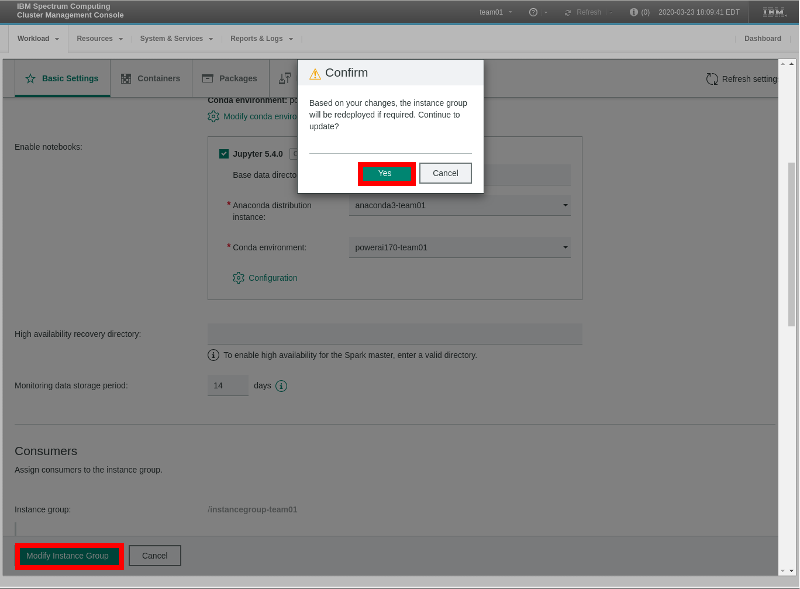 Commit changes to instance group configuration

Click ***Start*** to activate the instance group and make it ready to accept work. 

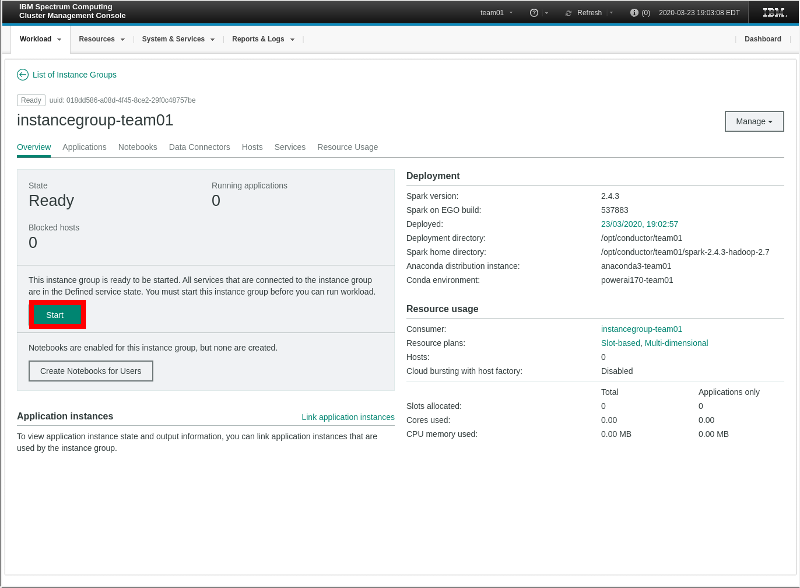

At this stage there is now an instance group ready to accept new work with Jupyter notebooks enabled.  

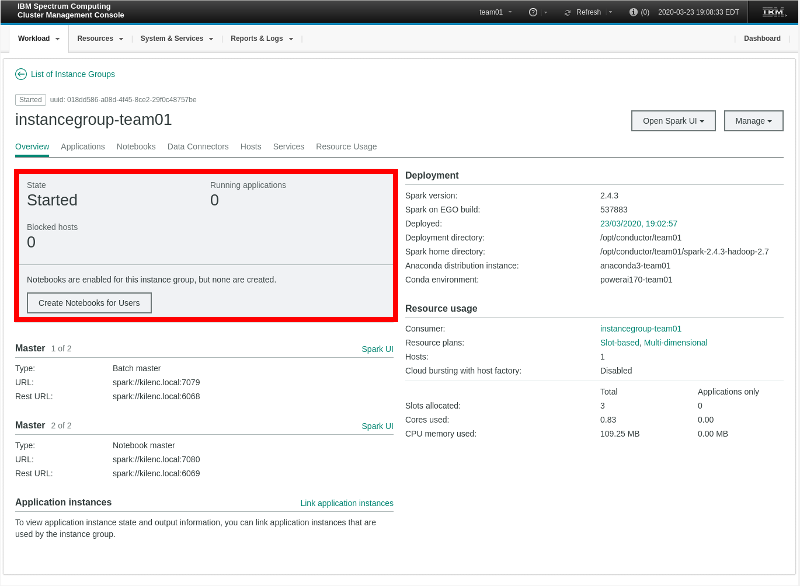

### 4.4 Enabling notebooks in an Instance Group and running an example

1. Browse to ***Workload*** -> ***Instance Groups*** and click on the instance group ***instancegroup-***<font color='red'>***login***</font>.  Select the tab ***Notebooks*** and click on the button ***Create Notebooks for Users***. Check only for user <font color='red'>***login***</font> and click ***Create***.  

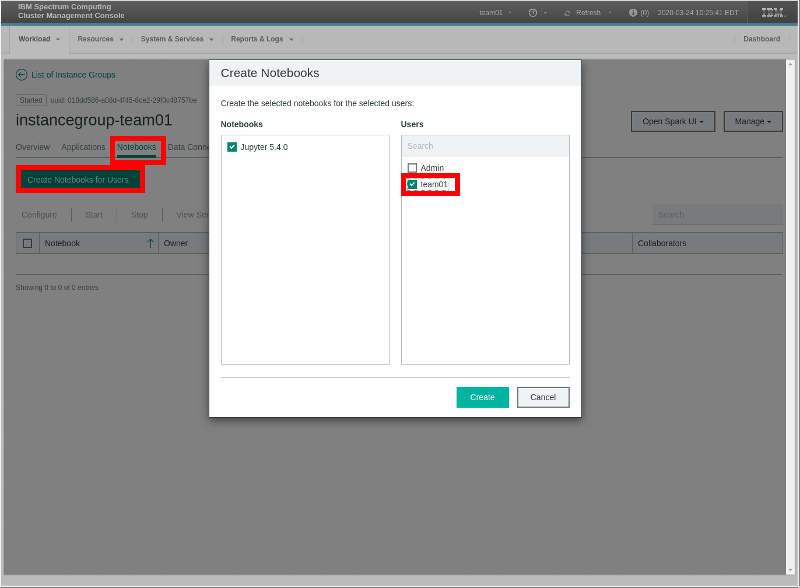

The notebook will appear in the list of available notebooks with status ***Started***. 

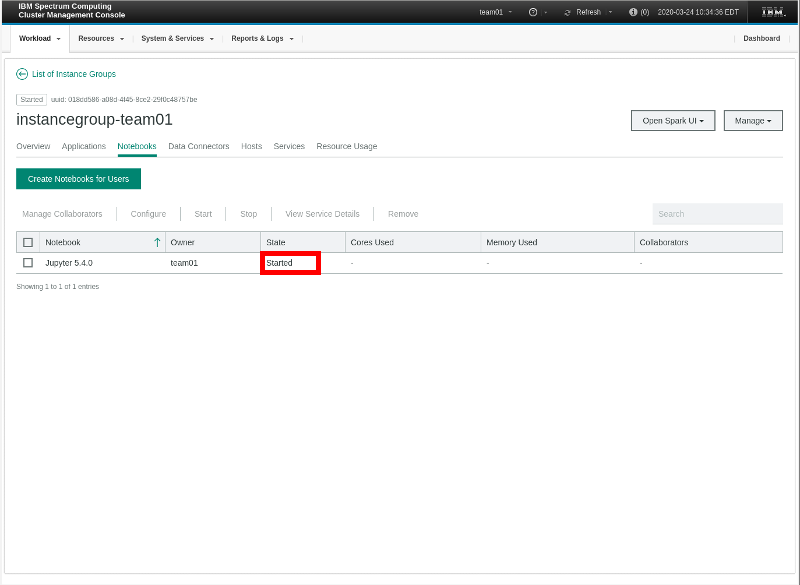

2. Access the notebook by clicking the ***My Notebooks*** drop down list and selecting ***Jupyter 5.4.0 - owned by*** <font color='red'>***login***</font>. 



3. A new browser window with the Jupyer notebook login will appear. Here enter your assigned login and password.  

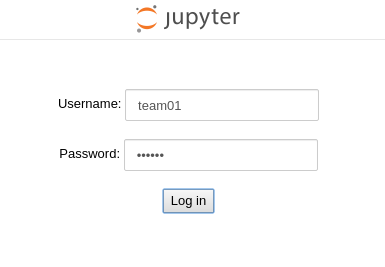

4. You will find that there are no notebooks to load as this is a new Jupyter instance. Create a new notebook by selecting ***New*** -> ***Spark Python (Spark Cluster Mode)*** 

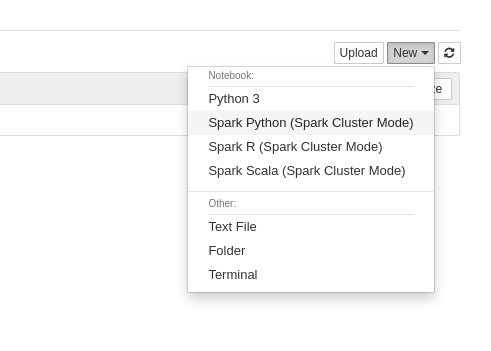

5. In the notebook editor, cut and paste the following code. This is Spark Python **SparkPi** example code. 



In [ ]:
from __future__ import print_function

import sys
from random import random
from operator import add

from pyspark.sql import SparkSession


if __name__ == "__main__":
    """
        Usage: pi [partitions]
    """
    spark = SparkSession\
        .builder\
        .appName("PythonPi")\
        .getOrCreate()

    partitions = 65
    n = 100000 * partitions

    def f(_):
        x = random() * 2 - 1
        y = random() * 2 - 1
        return 1 if x ** 2 + y ** 2 <= 1 else 0

    count = spark.sparkContext.parallelize(range(1, n + 1), partitions).map(f).reduce(add)
    print("Pi is roughly %f" % (4.0 * count / n))

6.  Click on ***File*** -> ***Save As*** to save the new notebook. Here we specify the filename ***sparkpi***. 



7.  Now we're ready to run the notebook. Click on the ***Run*** icon in the Jupyter notebook. This will start executing the code with Spectrum Conductor managing the underlying tasks. Note that this code is parallelized and will use multiple executors. 

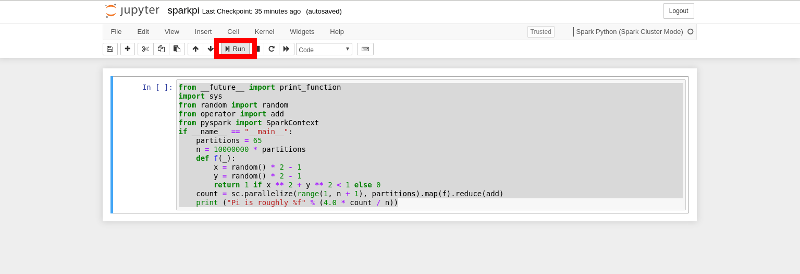

8. Switching back to the Spectrum Conductor interface (leave the notebook window open), browse to ***Workload*** -> ***My Applications & Notebooks***. Here you will find the notebook instance that was started earlier.  

Click on the notebook instance hyperlink to view the details about the notebook. 



On the notebook detail screen, select the ***Performance*** tab. Here you should see a spike in running an completed tasks corresponding to the ***SparkPi*** example that was started earlier. 



9.  Return to the Jupyter notebook window. You may see a ***Notebook Changed*** message indicating that the contents of the notebook has changed. Select ***Reload*** if this is the case and you will see the result of the ***SparkPi*** example program. If not, the ***SparkPi*** example may still running. Here we see the result printed to the notebook once the run is complete.

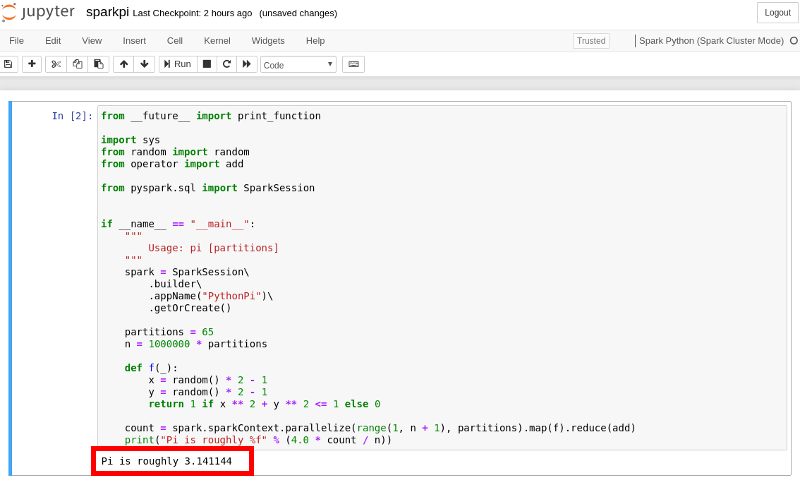


### 4.5 Criteo example using SnapML

Next, we will show an example of running SnapML through a Jupyter notebook.  SnapML is supplied by the IBM Watson Machine Learning Community Edition conda channel that was setup earlier. Here SnapML will be used to train a logistic regression classifier for the task of click through rate prediction.

The dataset that will be used is from the Display Advertising Challenge by Criteo from 2014.  More details can be found [here](https://www.kaggle.com/c/criteo-display-ad-challenge). The example code is based upon the example [Click-Through Rate Prediction at large scale](https://ibmsoe.github.io/snap-ml-doc/notebookcreditmpi.html). 

1. Return to the running Jupyter notebook that was created in the previous section.  Create a new Jupyter notebook of type ou will find that there are no notebooks to load as this is a new Jupyter instance. Create a new notebook of type ***Spark Python (Spark Cluster Mode)***.  Save the empty notebook as filename ***criteo-snapml.ipynb***. 

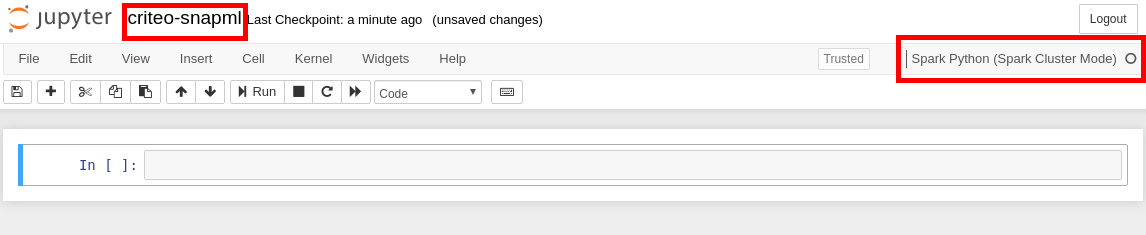


### Download dataset

Download the small Criteo training and testing datasets from an internal Box link.  Note that you will be required to update all references to ***team01*** with your assigned <font color='red'>***login***</font>.  



In [ ]:
# Create directory to store the dataset
dataset_path='/gpfs/software/wmla-p10a117/dli_data_fs/dataset/'
dataset_filename='small.criteo.kaggle2014.train.svm'

#!mkdir -p $dataset_path

# Retrieve the example small dataset (Criteo 2014)  
!cd $dataset_path && wget -v -O small.criteo.kaggle2014.train.svm -L https://ibm.box.com/shared/static/6ti02ne1l9xil9qr8tpz666pbd2zink3

### SnapML configuration

Perform the necessary configuration for SnapML for the Jupyter notebook. Here you will require to specify the correct path for the environment corresponding for your user.  Change all references to ***team01*** in the path with your assigned <font color='red'>***login***</font>.

In [1]:
import sys
sys.path.append("/gpfs/software/wmla-p10a117/wmla_anaconda/b0p036a/anaconda/envs/powerai162/snap-ml-spark/lib/snap-ml-spark-v1.4.0-ppc64le.jar")

### Configure Spark properties

Configuration of Spark properties.  Note that these parameters may also be set on the Spark instance group level. 

In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql.session import SparkSession

spark = SparkSession\
        .builder\
        .appName("PythonPi")\
        .getOrCreate()

spark.conf.set("spark.solver.count", "1")
spark.conf.set("spark.ego.gpu.app", "true")
spark.conf.set("spark.ego.gpu.executors.slots.max", "1")
spark.conf.set("spark.default.parallelism", "1")
spark.conf.set("spark.driver.maxResultSize", "0")

### Training and Evaluating a Logistic Regression Model using GPU using SnapML

In [3]:
from __future__ import print_function
import os
import time

# Import SnapML
from snap_ml_spark import DatasetReader
from snap_ml_spark import LogisticRegression as snapml_LogisticRegression
from snap_ml_spark.Metrics import accuracy, logisticLoss

### Process and load data

In [4]:
# Load the data
from sklearn.datasets import load_svmlight_file

filename = "/gpfs/software/wmla-p10a117/dli_data_fs/dataset/small.criteo.kaggle2014.train.svm"
train_filename=filename+'-train.libsvm'
test_filename=filename+'-test.libsvm'

print('Loading criteo45m dataset...')
X,y = load_svmlight_file(filename)

print('splitting data...')
# Make the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Save to libsvm files (index must start from 1)
from sklearn.datasets import dump_svmlight_file
print('Writing training data to libsvm format')
dump_svmlight_file(X_train,y_train, filename+'-train.libsvm', zero_based=False)
print('Writing test data to libsvm format')
dump_svmlight_file(X_test,y_test, filename+'-test.libsvm', zero_based=False)

#  Load the dataset
n_features_ = 1000000

print('Loading training data...')
train_data = DatasetReader().setFormat("libsvm").setNumFt(n_features_).load(train_filename)

print('Loading test data...')
test_data = DatasetReader().setFormat("libsvm").setNumFt(n_features_).load(test_filename)

Loading criteo45m dataset...
splitting data...
Writing training data to libsvm format
Writing test data to libsvm format
Loading training data...
Loading test data...


### Train SnapML LogisticRegression

In [7]:
# Create snapML Logistic Regression
snapml_regularizer = 10.0
snapml_lr = snapml_LogisticRegression(max_iter=45, regularizer=snapml_regularizer, verbose=False, dual=True, use_gpu=True, n_threads=-1)

# Fit the model and time it
snapml_t0 = time.time()
snapml_lr.fit(train_data)
snapml_time = time.time() - snapml_t0

# Perform inference on test data
pred = snapml_lr.predict(test_data)

# Compute accuracy
snapml_accuracy  = accuracy(pred)

# Print off SnapML  result
print('snapML  accuracy: %.4f' %snapml_accuracy, ", time: %.2f" % snapml_time, 's\n')

snapML  accuracy: 0.7840 , time: 9.58 s



### Train using SparkML

In [6]:
from pyspark.ml.classification import LogisticRegression as sparkml_LogisticRegression

train_filename2 = "file://" + train_filename
test_filename2 = "file://" + test_filename

# Load training data
train_data = spark.read.format("libsvm").option("numFeatures", str(n_features_)).load(train_filename2)
test_data = spark.read.format("libsvm").option("numFeatures", str(n_features_)).load(test_filename2)
n_examples = train_data.count()

# Create sparkML lib Logistic Regression
sparkml_lr = sparkml_LogisticRegression(fitIntercept=False, regParam=snapml_regularizer/n_examples, standardization=False)

# Fit the model and time it
sparkml_t0 = time.time()
sparkml_lr_model = sparkml_lr.fit(train_data)
sparkml_time = time.time() - sparkml_t0

# Perform inference on test data
predictions = sparkml_lr_model.transform(test_data)

# Show predictions against test labels
# predictions.select("rawPrediction", "prediction", "label", "features").show(10)

# Compute accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
sparkml_accuracy = evaluator.evaluate(predictions)

# Print off Spark result

print('Spark ML', evaluator.getMetricName(),'=', sparkml_accuracy,", time: %.2f" % sparkml_time, 's\n')

Spark ML accuracy = 0.784 , time: 55.69 s



You will note the significant performance advantage offered by SnapML running on a GPU as opposed to SparkML running on a CPU. 

In [ ]:
# Show predictions against test labels
predictions.select("rawPrediction", "prediction", "label", "features").show(10)

# -------------------------------------------------------------------------------

## Appendix A - Introduction to Spectrum Conductor Commands

We'll now review a very basic set of EGO commands for underlying resource management system of Spectrum Conductor. 

The EGO *egosh* command is used to launch the administrative command line interface.  It accepted a number of operators which we provide examples of below.  

First login using your assigned login and password to the EGO administrative interface as follows.  Note that *-x* is used to specify the password and *-u* is used to specify the login/username. 

Before we begin, we must source the Spectrum Conductor environment.  

In [ ]:
source /opt/ibm/spectrumcomputing/profile.platform

With the environment source, we can now run the Spectrum Conductor/EGO commands. 

In [ ]:
!egosh user logon -x team01 -u team01

Display information about the resource groups with the *rg* operator

In [ ]:
!egosh rg -l

List all of the different services of Spectrum Conductor which are under EGO control

In [ ]:
!egosh service list -l

# ---------------------------------------------------------------------
# End of Lab